# Final Project ML Regression | Insurance Charges Prediction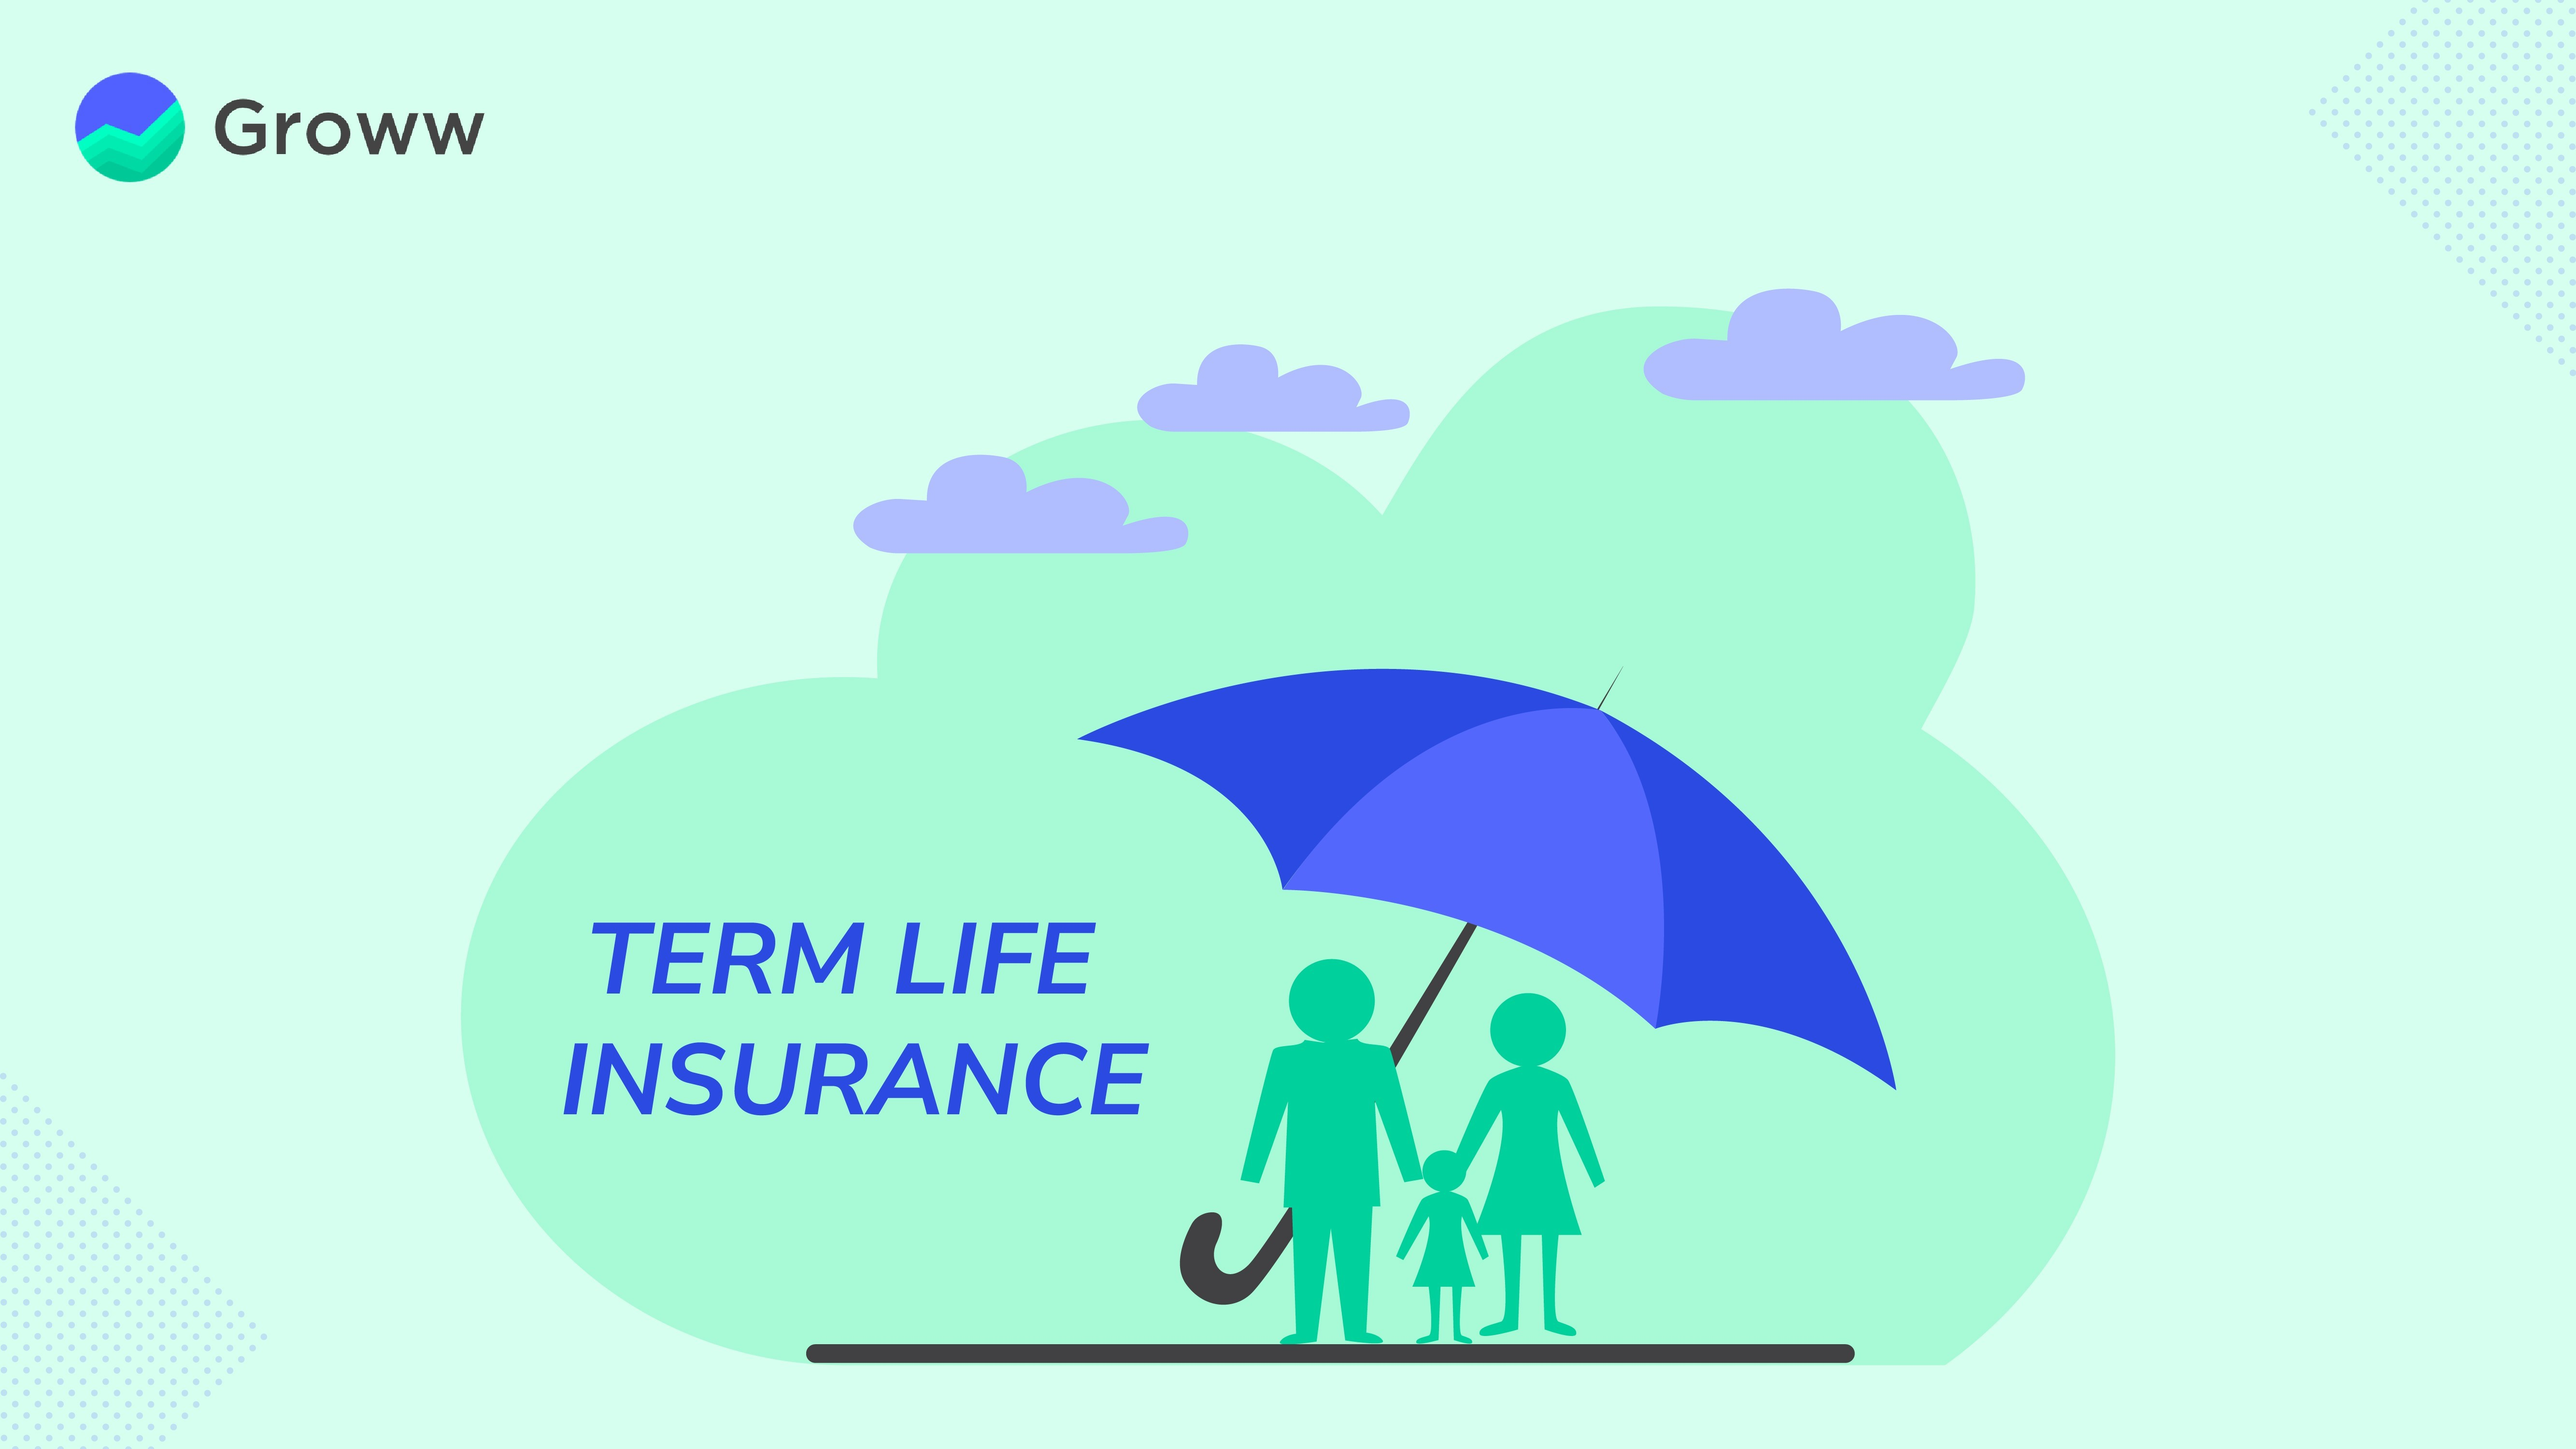



In this notebooks we'll cover the following concepts on an insuracne dataset



*  Dataset Description+EDA
*  Normality

*   Feature Engineering
*   Hypothesis Testing





In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [9]:
data=pd.read_csv("/content/drive/MyDrive/DataSets/insurance.csv")

In [10]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.

**Features**

*  **age**: age of customer | patient
*   **sex**: male-female

*   **bmi**: body mass index
*  **children**: number of children

*   **region**: residential area
*   charges: insurance charges







In [11]:
# num of rows x num of columns
print('Dataset Dimensions:',data.shape)
print("---------------------------------")
# types of each column
print(data.dtypes)

Dataset Dimensions: (1338, 7)
---------------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
#Converting categorical features into numerical features
# Select the object (string) columns
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for category in categorical_cols:
    le.fit(data[category].drop_duplicates())
    data[category] = le.transform(data[category])


In [16]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


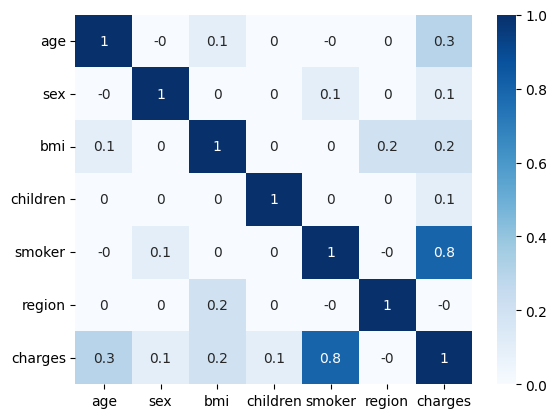

In [17]:
# Studying the corellations between features using Heat Map!
plt.figure(dpi=100)
sns.heatmap(np.round(data.corr(),1),annot=True, cmap="Blues")
plt.show()

In [18]:
# sorting features according to the strength of corretlation with charges feature
data.corr()['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

# Determining Normality
Making our target variable normally distributed often will lead to better results If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values. How can we tell if our target is normally distributed? There are two ways:

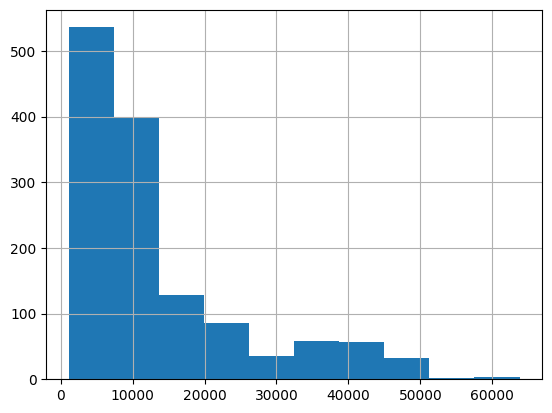

In [19]:
data.charges.hist();

In [20]:
# applying D'Agostino K^2 test to check the normality!
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(data.charges.values)

NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)

Transformations techniques to get or approach normal distribution:

* Square Root
* Log
* Box-Cox


NormaltestResult(statistic=112.4605295472106, pvalue=3.7975744156203163e-25)

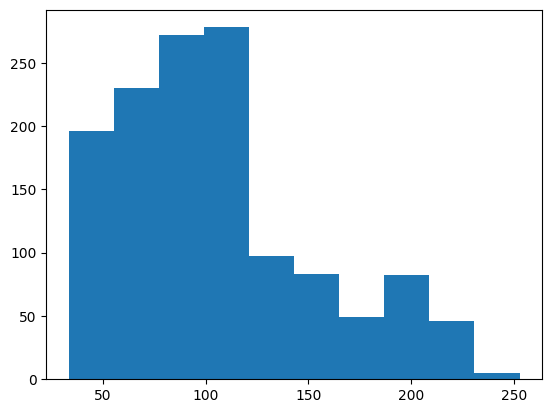

In [21]:
# applying log transform on chareges feature:
sqrt_charges = np.sqrt(data.charges)
plt.hist(sqrt_charges)

# applying D'Agostino K^2 test to check the normality!
sqrt_test_res = normaltest(sqrt_charges.values)
sqrt_test_res

NormaltestResult(statistic=52.71670509113935, pvalue=3.5703676381337117e-12)

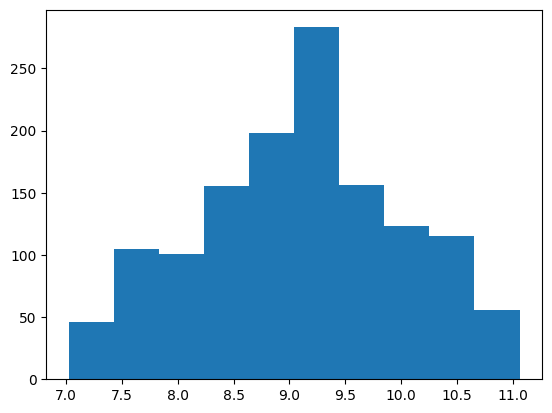

In [22]:
# applying log transform on chareges feature:
log_charges = np.log(data.charges)
plt.hist(log_charges)

# applying D'Agostino K^2 test to check the normality!
log_test_res = normaltest(log_charges.values)
log_test_res

In [23]:
from scipy.stats import boxcox

In [24]:
# applying box cox transform on chareges feature:
bc_result = boxcox(data.charges)
boxcox_medv = bc_result[0]
lam = bc_result[1]

NormaltestResult(statistic=54.4181017156977, pvalue=1.5249631686757666e-12)

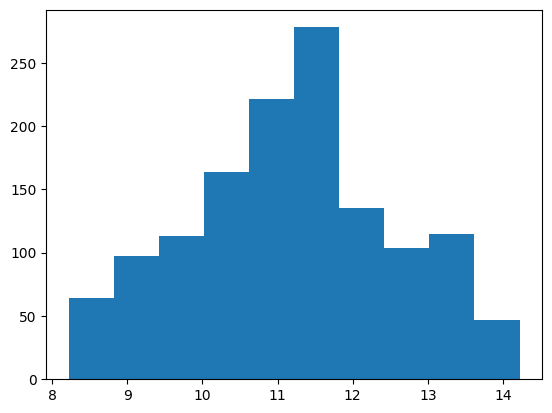

In [25]:
plt.hist(boxcox_medv)
boxcox_test_res= normaltest(boxcox_medv)
boxcox_test_res

In [26]:
d = {'Transormation': ['Square-Root', 'Log', 'Box Cox' ], 'P-value': [sqrt_test_res[1], log_test_res[1], boxcox_test_res[1]]}
df_results = pd.DataFrame(data=d)
df_results

,Transormation,P-value
0,Square-Root,3.797574e-25
1,Log,3.570368e-12
2,Box Cox,1.524963e-12


#Applying Various Regression Models

In [27]:
# Importing Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [28]:
insurance_data = data

# Select the object (string) columns
mask = insurance_data.dtypes == np.object
categorical_cols = insurance_data.columns[mask]

# convert categorical data into numerical data
le = LabelEncoder()
for category in categorical_cols:
    le.fit(insurance_data[category].drop_duplicates())
    insurance_data[category] = le.transform(insurance_data[category])

X = insurance_data.drop(['charges','region'], axis=1)
y = insurance_data.charges

pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pf, y,
                                                    test_size=0.3, random_state=42)

# Applying various linear regression models with advanced techniques

* Chain multiple data processing steps together using Pipeline
* Use the KFolds object to split data into multiple folds.
* Perform cross validation using SciKit Learn with cross_val_predict and GridSearchCV

In [31]:
# Importing Libraries
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [32]:
# Select the object (string) columns
mask = insurance_data.dtypes == np.object
categorical_cols = insurance_data.columns[mask]

le = LabelEncoder()
for category in categorical_cols:
    le.fit(insurance_data[category].drop_duplicates())
    insurance_data[category] = le.transform(insurance_data[category])

X = insurance_data.drop(['charges','region'], axis=1)
y = insurance_data.charges

# create folds
kf = KFold(shuffle=True, random_state=42, n_splits=3)

In [33]:
#Vanilla-LR
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("linear_regression", LinearRegression())])

params = {
    "polynomial_features__degree": range(3),
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.8397822567381751, {'polynomial_features__degree': 2})

In [34]:
best_vanilla_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("vanilla_regression", LinearRegression())])

best_vanilla_estimator.fit(X, y)
best_vanilla_estimator.score(X, y)

0.8439233059139881

In [35]:
#LASSO
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "lasso_regression__alpha": np.geomspace(0.01, 30, 50)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.8401685994822629,
 {'lasso_regression__alpha': 30.0, 'polynomial_features__degree': 2})

In [36]:
best_lasso_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.85))])

best_lasso_estimator.fit(X, y)
best_lasso_estimator.score(X, y)

0.8439616624263708

In [37]:
#Ridge
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    "polynomial_features__degree": [1, 2, 3],
    "ridge_regression__alpha": np.geomspace(2, 30, 20)
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_

(0.8399073635712647,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 16.96379809972482})

In [38]:
best_ridge_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=19.56))])

best_ridge_estimator.fit(X, y)
best_ridge_estimator.score(X, y)

0.8439083186434307

In [39]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [40]:
pf = PolynomialFeatures(degree=2)
s = StandardScaler()

X_pf = pf.fit_transform(X)
X_s = s.fit_transform(X_pf)
X_train, X_test, y_train, y_test = train_test_split(X_s, y,
                                                    shuffle=True, test_size=0.3, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_R2 = r2_score(y_test, linearRegression.predict(X_test))
print(linearRegression_rmse)
print(linearRegression_R2)

4496.560110896625
0.8621029955994312


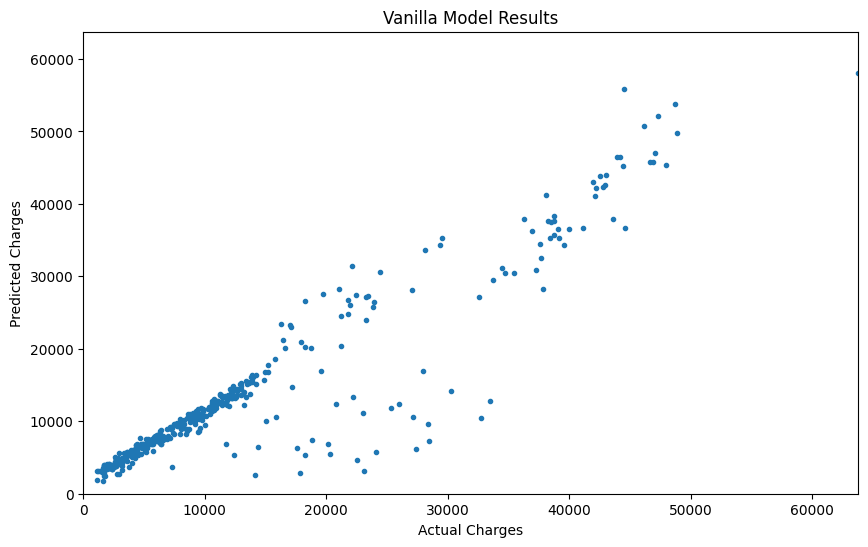

In [42]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test),
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges',
       ylabel='Predicted Charges',
       xlim=lim,
       ylim=lim,
       title='Vanilla Model Results');

In [43]:
from sklearn.linear_model import LassoCV
alphas = np.geomspace(0.1, 400, 1000)
lassoCV = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower
print(lassoCV_R2)
13.7454744402372

13.7454744402372 4496.577651935266
0.8621019197275019


13.7454744402372

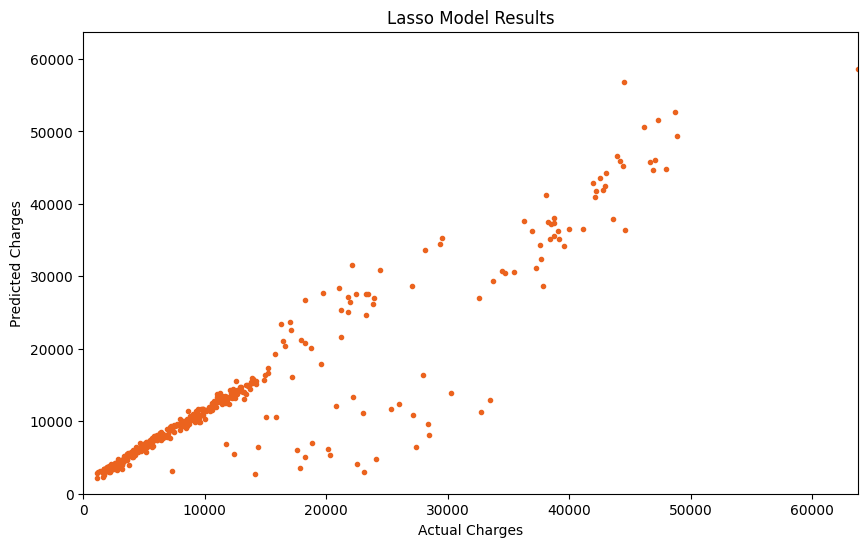

In [44]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, lassoCV.predict(X_test),
         marker='o', ls='', color='#eb631e', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges',
       ylabel='Predicted Charges',
       xlim=lim,
       ylim=lim,
       title='Lasso Model Results');


In [45]:
from sklearn.linear_model import RidgeCV

alphas = np.geomspace(0.01, 20, 1000).tolist()
ridgeCV = RidgeCV(alphas=alphas, cv=3).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridgeCV_R2 = r2_score(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)
print(ridgeCV_R2)

0.5597483996302115 4494.682979659045
0.8622181043662678


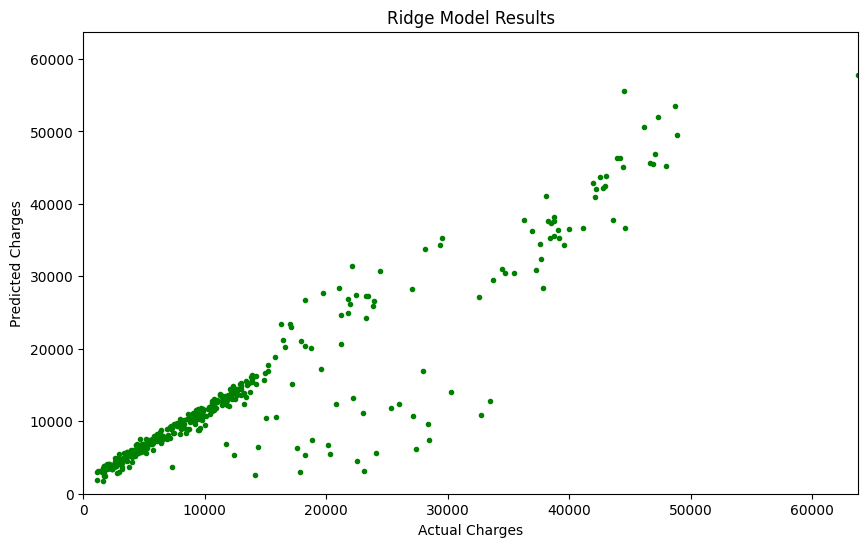

In [46]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, ridgeCV.predict(X_test),
         marker='o', ls='', color='g', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges',
       ylabel='Predicted Charges',
       xlim=lim,
       ylim=lim,
       title='Ridge Model Results');

In [50]:
from sklearn.linear_model import ElasticNetCV
alphas = np.geomspace(0.001, 1, 100)
l1_ratios = np.linspace(0.1, 0.9, 10)

elasticNetCV = ElasticNetCV(alphas=alphas,
                            l1_ratio=l1_ratios,
                            max_iter=1).fit(X_train, y_train)

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
elasticNetCV_R2 = r2_score(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)
print(ridgeCV_R2)

0.001 0.9 5804.885219301491
0.8622181043662678


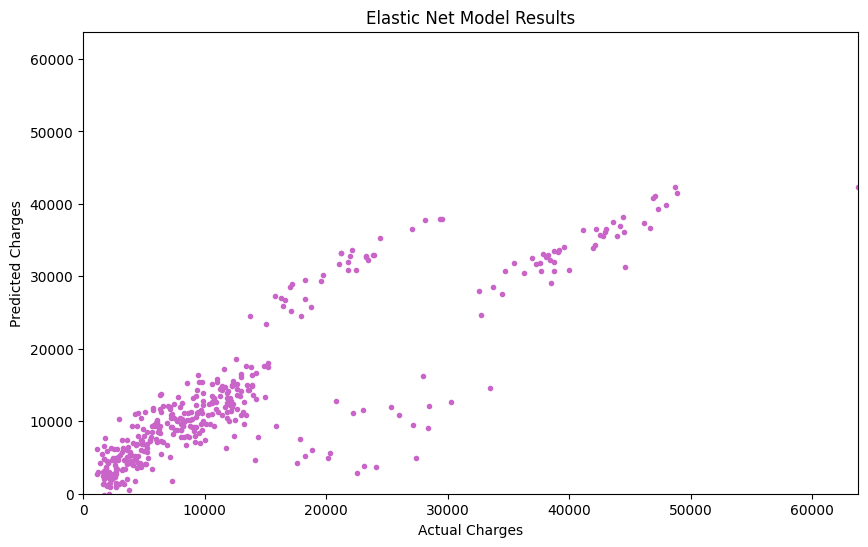

In [51]:
f = plt.figure(figsize=(10,6))
ax = plt.axes()

ax.plot(y_test, elasticNetCV.predict(X_test),
         marker='o', ls='', color='#c965c8', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Charges',
       ylabel='Predicted Charges',
       xlim=lim,
       ylim=lim,
       title='Elastic Net Model Results');

In [52]:
rmse_vals = [linearRegression_rmse, lassoCV_rmse, ridgeCV_rmse, elasticNetCV_rmse]
R2_vals = [linearRegression_R2, lassoCV_R2, ridgeCV_R2, elasticNetCV_R2]

labels = ['Linear', 'Lasso', 'Ridge', 'ElasticNet']
metric_df = pd.Series(rmse_vals, index=labels).to_frame()
metric_df.rename(columns={0: 'RMSE'}, inplace=1)
metric_df['R2'] = R2_vals
metric_df

,RMSE,R2
Linear,4496.560111,0.862103
Lasso,4496.577652,0.862102
Ridge,4494.682980,0.862218
ElasticNet,5804.885219,0.770183
